<a href="https://colab.research.google.com/github/vincitore1/Change-Password/blob/main/Salinan_Klasifikasi_buah_jeruk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile
file_name = "/content/sample_data/archive.zip"

with ZipFile(file_name, 'r') as zip_file:
  zip_file.extractall()
  print('Done')

Done


📥 Memuat dataset...
📊 Membagi data menjadi train dan validasi...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
🏋️ Mulai training model...
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 488ms/step - accuracy: 0.6721 - loss: 0.7687 - val_accuracy: 1.0000 - val_loss: 0.0229
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 232ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 9.3667e-04
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 347ms/step - accuracy: 1.0000 - loss: 5.5555e-04 - val_accuracy: 1.0000 - val_loss: 8.6484e-04
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 1.0000 - loss: 4.2279e-04 - val_accuracy: 1.0000 - val_loss: 8.3510e-04
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 1.0000

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

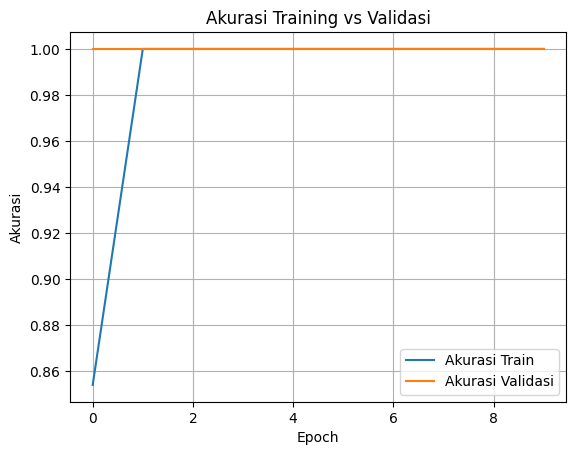

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# ===============================
# Load Dataset
# ===============================
def load_dataset(dataset_dir, label_kelas):
    X, y = [], []
    for i, label in enumerate(label_kelas):
        folder = os.path.join(dataset_dir, label)
        for filename in os.listdir(folder):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                img = cv2.imread(os.path.join(folder, filename))
                img = cv2.resize(img, (128, 128))
                img = img.astype('float32') / 255.0
                X.append(img)
                y.append(i)
    return np.array(X), to_categorical(y, num_classes=len(label_kelas))

# ===============================
# Buat Model Transfer Learning
# ===============================
def create_model(num_classes):
    base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
    base_model.trainable = False  # Freeze layer awal

    inputs = Input(shape=(128, 128, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ===============================
# Training Program
# ===============================
if __name__ == "__main__":
    dataset_path = "/content/KLASIFIKASI BUAH JERUK CHINA MANIS DAN NIPIS 80, 10, 10/train"
    label_kelas = ["Jeruk China", "Jeruk Manis", "Jeruk Nipis"]

    print("📥 Memuat dataset...")
    X, y = load_dataset(dataset_path, label_kelas)

    print("📊 Membagi data menjadi train dan validasi...")
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

    model = create_model(len(label_kelas))
    print("🏋️ Mulai training model...")
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16)

    model.save("model_jeruk_transfer.keras")
    print("✅ Model disimpan sebagai model_jeruk_transfer.h5")

    # Setelah model = create_model(...)
    model = create_model(len(label_kelas))

    # ⬇️ Tambah di sini
    print("📋 Ringkasan arsitektur model:")
    model.summary()


    # Visualisasi hasil training
    plt.plot(history.history['accuracy'], label='Akurasi Train')
    plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
    plt.title("Akurasi Training vs Validasi")
    plt.xlabel("Epoch")
    plt.ylabel("Akurasi")
    plt.legend()
    plt.grid(True)
    plt.show()


📂 Membaca dari: /content/KLASIFIKASI BUAH JERUK CHINA MANIS DAN NIPIS 80, 10, 10/test/coba
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

🟩 Hasil Klasifikasi:
jeruk nipis (2).jpg: Jeruk Nipis (Confidence: 99.99%)
Jeruk China  (7).jpg: Jeruk China (Confidence: 100.00%)
Jeruk Manis (2).jpg: Jeruk Manis (Confidence: 99.99%)

🖼️ Menampilkan gambar hasil klasifikasi...


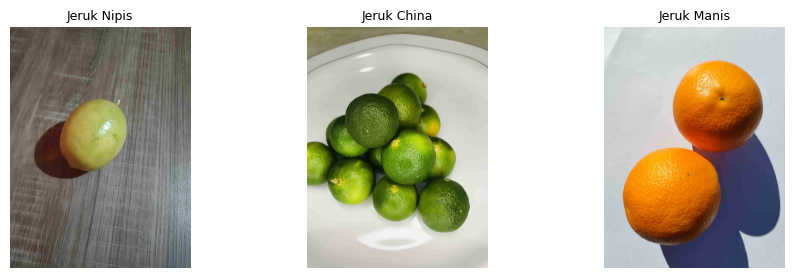

In [7]:
# ===============================
# Import Library
# ===============================
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# ===============================
# Fungsi Klasifikasi Citra
# ===============================
def Klasifikasi(DirDataSet, SubFolder, LabelKelas, ModelCNN):
    X = []
    NamaFile = []
    GambarAsli = []

    DirKelas = os.path.join(DirDataSet, SubFolder)
    print("📂 Membaca dari:", DirKelas)

    files = os.listdir(DirKelas)
    for f in files:
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            NamaFile.append(f)
            img_path = os.path.join(DirKelas, f)
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Simpan versi RGB untuk ditampilkan
            GambarAsli.append(img_rgb)

            img = cv2.resize(img, (128, 128))
            img = img.astype('float32') / 255.0
            X.append(img)

    # Konversi ke numpy array
    X = np.array(X)

    # Prediksi dengan model CNN
    hasil_prediksi = ModelCNN.predict(X)

    LabelPrediksi = []
    for v in hasil_prediksi:
        if v.max() > 0.5:
            idx = np.argmax(v)
            LabelPrediksi.append(LabelKelas[idx])
        else:
            LabelPrediksi.append("Tidak Yakin")

    return NamaFile, hasil_prediksi, LabelPrediksi, GambarAsli

# ===============================
# Program Utama: Klasifikasi
# ===============================
if __name__ == "__main__":
    DirektoriDataSet = "/content/KLASIFIKASI BUAH JERUK CHINA MANIS DAN NIPIS 80, 10, 10/test"
    FolderKlasifikasi = "coba"
    LabelKelas = ["Jeruk China", "Jeruk Manis", "Jeruk Nipis"]

    # Load model dari file H5
    ModelCNN = load_model("/content/model_jeruk_transfer.keras")

    # Lakukan klasifikasi
    NamaFile, Probabilitas, Prediksi, GambarAsli = Klasifikasi(DirektoriDataSet, FolderKlasifikasi, LabelKelas, ModelCNN)

    # Tampilkan hasil klasifikasi
    print("\n🟩 Hasil Klasifikasi:")
    for nama, label, prob in zip(NamaFile, Prediksi, Probabilitas):
      confidence = np.max(prob) * 100
      print(f"{nama}: {label} (Confidence: {confidence:.2f}%)")


    # Tampilkan gambar beserta prediksi labelnya
    print("\n🖼️ Menampilkan gambar hasil klasifikasi...")
    plt.figure(figsize=(15, 8))
    for i in range(len(GambarAsli)):
        plt.subplot(3, 5, i+1)  # Menyesuaikan jumlah per baris
        plt.imshow(GambarAsli[i])
        plt.title(Prediksi[i], fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [6]:
# app.py

# Pastikan dependencies diinstall (hanya di Colab, tidak perlu di script lokal)
# !pip install gradio opencv-python numpy

import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

# ===============================
# Load model hasil training
# ===============================
model = load_model("/content/model_jeruk_transfer.keras")
class_labels = ["Jeruk China", "Jeruk Manis", "Jeruk Nipis"]

# ===============================
# Fungsi Prediksi Gambar Tunggal
# ===============================
def predict_image(img: Image.Image):
    # Preprocessing gambar sesuai pipeline training
    img = img.resize((128, 128))
    img_array = img_to_array(img).astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Batch size 1

    # Prediksi
    pred = model.predict(img_array)[0]

    # Ambil label dan skor probabilitas
    result = {label: float(score) for label, score in zip(class_labels, pred)}
    return result

# ===============================
# Antarmuka Gradio
# ===============================
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3),
    title="Klasifikasi Buah Jeruk",
    description="Upload gambar buah jeruk (China, Manis, atau Nipis) dan sistem akan memprediksi jenisnya."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://679f39111462850ecb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
